In [1]:
import pandas as pd

In [2]:
# Read the data from the CSV file
data = pd.read_csv(r'data\owid-covid-data.csv')


In [12]:
data.head().T

,0,1,2,3,4
iso_code,AFG,AFG,AFG,AFG,AFG
continent,Asia,Asia,Asia,Asia,Asia
location,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
date,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28
total_cases,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...
human_development_index,0.511,0.511,0.511,0.511,0.511
excess_mortality_cumulative_absolute,NaN,NaN,NaN,NaN,NaN
excess_mortality_cumulative,NaN,NaN,NaN,NaN,NaN
excess_mortality,NaN,NaN,NaN,NaN,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

In [8]:
a = list[data["iso_code"].value_counts().head(10)]
a

list[iso_code
ARG         795
MEX         795
THA         792
TWN         780
CHN         774
OWID_ASI    774
OWID_NAM    774
MAC         774
KOR         774
OWID_UMC    774
Name: count, dtype: int64]

In [23]:
twn_data = data[data["iso_code"] == "TWN"]
arg_data = data[data["iso_code"] == "ARG"]
mex_data = data[data["iso_code"] == "MEX"]
tha_data = data[data["iso_code"] == "THA"]
usa_data = data[data["iso_code"] == "USA"]

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

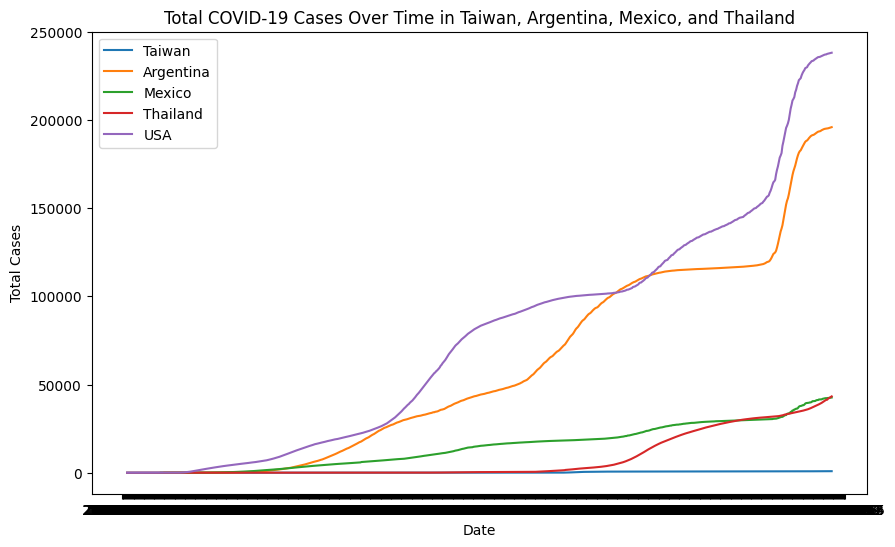

In [24]:
# Draw a line plot of total cases over time
plt.figure(figsize=(10, 6))
sns.lineplot(x="date", y="total_cases_per_million", data=twn_data, label="Taiwan")
sns.lineplot(x="date", y="total_cases_per_million", data=arg_data, label="Argentina")
sns.lineplot(x="date", y="total_cases_per_million", data=mex_data, label="Mexico")
sns.lineplot(x="date", y="total_cases_per_million", data=tha_data, label="Thailand")
sns.lineplot(x="date", y="total_cases_per_million", data=usa_data, label="USA")
plt.title("Total COVID-19 Cases Over Time in Taiwan, Argentina, Mexico, and Thailand")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()